In [2]:
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importing datasets
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)
df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
245,Northwest Territories,Canada,64.825500,-124.845700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
246,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
247,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,71,86


In [4]:
dfs=pd.melt(df,id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date')

In [5]:
dfs

,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
16429,NaN,Saint Kitts and Nevis,17.357822,-62.782998,3/27/20,2
16430,Northwest Territories,Canada,64.825500,-124.845700,3/27/20,1
16431,Yukon,Canada,64.282300,-135.000000,3/27/20,3
16432,NaN,Kosovo,42.602636,20.902977,3/27/20,86


In [6]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16434 entries, 0 to 16433
Data columns (total 6 columns):
Province/State    5016 non-null object
Country/Region    16434 non-null object
Lat               16434 non-null float64
Long              16434 non-null float64
Date              16434 non-null object
value             16434 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 770.5+ KB


In [7]:
dfs['Date']=pd.to_datetime(dfs['Date'])

In [8]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16434 entries, 0 to 16433
Data columns (total 6 columns):
Province/State    5016 non-null object
Country/Region    16434 non-null object
Lat               16434 non-null float64
Long              16434 non-null float64
Date              16434 non-null datetime64[ns]
value             16434 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 770.5+ KB


In [9]:
dfs=dfs.sort_values(['Country/Region','Province/State','Date']).reset_index(drop=True)


In [10]:
dfs

,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0
1,NaN,Afghanistan,33.0,65.0,2020-01-23,0
2,NaN,Afghanistan,33.0,65.0,2020-01-24,0
3,NaN,Afghanistan,33.0,65.0,2020-01-25,0
4,NaN,Afghanistan,33.0,65.0,2020-01-26,0
...,...,...,...,...,...,...
16429,NaN,Zimbabwe,-20.0,30.0,2020-03-23,3
16430,NaN,Zimbabwe,-20.0,30.0,2020-03-24,3
16431,NaN,Zimbabwe,-20.0,30.0,2020-03-25,3
16432,NaN,Zimbabwe,-20.0,30.0,2020-03-26,3


In [11]:
dfs[dfs['Country/Region']=='Thailand']

,Province/State,Country/Region,Lat,Long,Date,value
14850,NaN,Thailand,15.0,101.0,2020-01-22,2
14851,NaN,Thailand,15.0,101.0,2020-01-23,3
14852,NaN,Thailand,15.0,101.0,2020-01-24,5
14853,NaN,Thailand,15.0,101.0,2020-01-25,7
14854,NaN,Thailand,15.0,101.0,2020-01-26,8
...,...,...,...,...,...,...
14911,NaN,Thailand,15.0,101.0,2020-03-23,721
14912,NaN,Thailand,15.0,101.0,2020-03-24,827
14913,NaN,Thailand,15.0,101.0,2020-03-25,934
14914,NaN,Thailand,15.0,101.0,2020-03-26,1045


In [12]:
dfs[dfs['Country/Region']=='China']

,Province/State,Country/Region,Lat,Long,Date,value
3630,Anhui,China,31.8257,117.2264,2020-01-22,1
3631,Anhui,China,31.8257,117.2264,2020-01-23,9
3632,Anhui,China,31.8257,117.2264,2020-01-24,15
3633,Anhui,China,31.8257,117.2264,2020-01-25,39
3634,Anhui,China,31.8257,117.2264,2020-01-26,60
...,...,...,...,...,...,...
5803,Zhejiang,China,29.1832,120.0934,2020-03-23,1238
5804,Zhejiang,China,29.1832,120.0934,2020-03-24,1240
5805,Zhejiang,China,29.1832,120.0934,2020-03-25,1241
5806,Zhejiang,China,29.1832,120.0934,2020-03-26,1243


In [13]:
dfsct=dfs.groupby(['Country/Region','Date']).sum()[['value']]

In [14]:
dfsct

value
Country/Region Date             
Afghanistan    2020-01-22      0
               2020-01-23      0
               2020-01-24      0
               2020-01-25      0
               2020-01-26      0
...                          ...
Zimbabwe       2020-03-23      3
               2020-03-24      3
               2020-03-25      3
               2020-03-26      3
               2020-03-27      5

[11616 rows x 1 columns]

In [15]:
dfsct.loc['Thailand']

,value
Date,
2020-01-22,2
2020-01-23,3
2020-01-24,5
2020-01-25,7
2020-01-26,8
...,...
2020-03-23,721
2020-03-24,827
2020-03-25,934


In [16]:
dfsct.reset_index(inplace=True)
dfsct


,Country/Region,Date,value
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0
...,...,...,...
11611,Zimbabwe,2020-03-23,3
11612,Zimbabwe,2020-03-24,3
11613,Zimbabwe,2020-03-25,3
11614,Zimbabwe,2020-03-26,3


In [17]:
dfsct['daily_new']=dfsct.groupby(['Country/Region'])['value'].diff()

In [18]:
dfsct

,Country/Region,Date,value,daily_new
0,Afghanistan,2020-01-22,0,NaN
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0
...,...,...,...,...
11611,Zimbabwe,2020-03-23,3,0.0
11612,Zimbabwe,2020-03-24,3,0.0
11613,Zimbabwe,2020-03-25,3,0.0
11614,Zimbabwe,2020-03-26,3,0.0


In [19]:
#dfsct.loc['China']

In [20]:
#dfsct.loc['China'].to_csv('china_data.csv') 

In [21]:
dfTl=dfsct[dfsct['Country/Region']=='Thailand']

In [22]:
dfTl

,Country/Region,Date,value,daily_new
10428,Thailand,2020-01-22,2,NaN
10429,Thailand,2020-01-23,3,1.0
10430,Thailand,2020-01-24,5,2.0
10431,Thailand,2020-01-25,7,2.0
10432,Thailand,2020-01-26,8,1.0
...,...,...,...,...
10489,Thailand,2020-03-23,721,122.0
10490,Thailand,2020-03-24,827,106.0
10491,Thailand,2020-03-25,934,107.0
10492,Thailand,2020-03-26,1045,111.0


In [27]:
dfcn=dfsct[dfsct['Country/Region']=='China']

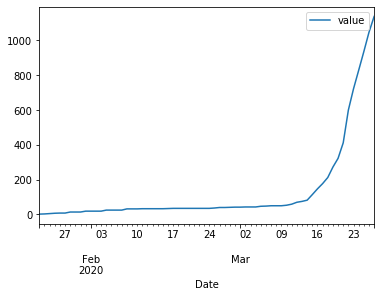

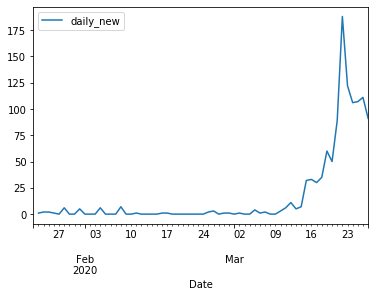

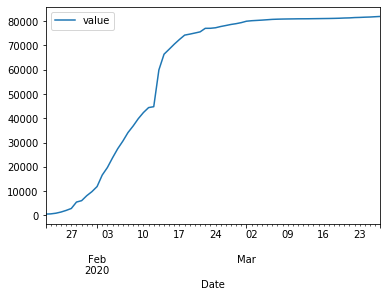

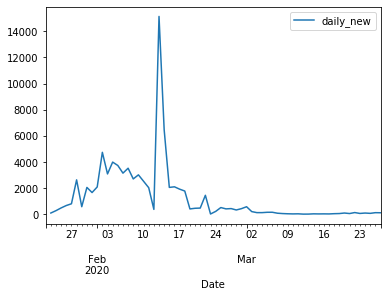

In [28]:
dfTl.plot(x ='Date', y='value', kind = 'line')
dfTl.plot(x ='Date', y='daily_new', kind = 'line')
dfcn.plot(x ='Date', y='value', kind = 'line')
dfcn.plot(x ='Date', y='daily_new', kind = 'line')
plt.show()
